<a href="https://colab.research.google.com/github/snehachavhan2004/OIBSIB/blob/main/Iris_flower_classification(Task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [ ]:
#df[df['Species']=='Iris-setosa']
n=len(df[df['Species'] == 'Iris-setosa'])
print('No. of Setosa in Dataset: ',n)

No. of Setosa in Dataset:  50


In [ ]:
n1 = len(df[df['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n1)

No of Versicolor in Dataset: 50


In [ ]:
n2 = len(df[df['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n2)

No of Virginica in Dataset: 50


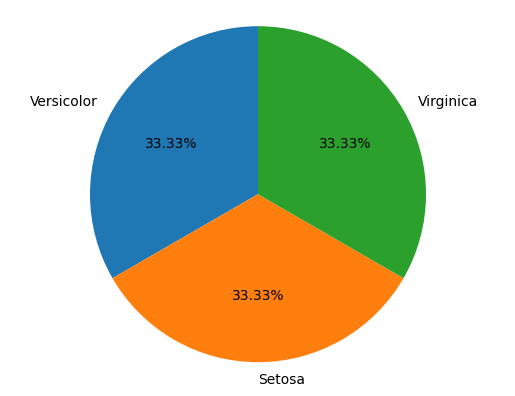

In [ ]:
labels = ['Versicolor', 'Setosa', 'Virginica']
sizes = [50, 50, 50]
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()

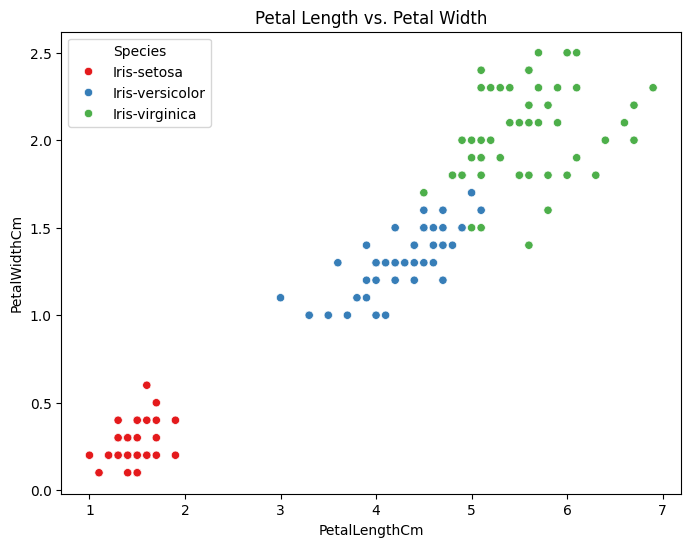

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, palette='Set1')
plt.title('Petal Length vs. Petal Width')
plt.show()

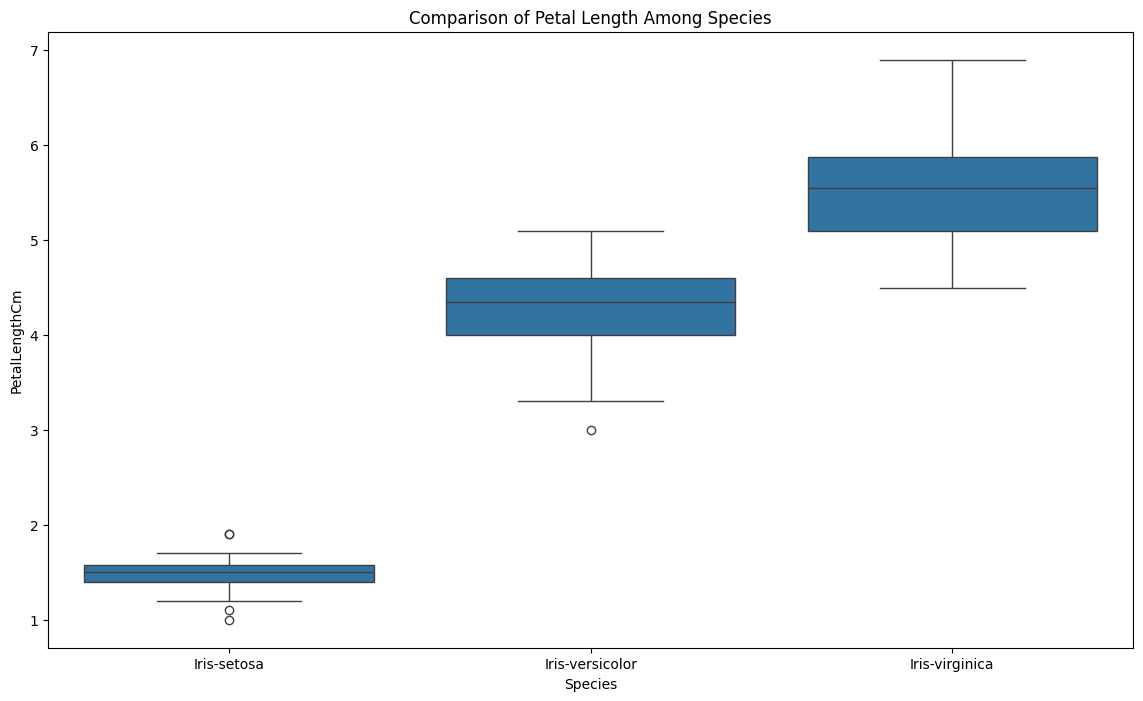

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Comparison of Petal Length Among Species')
plt.show()

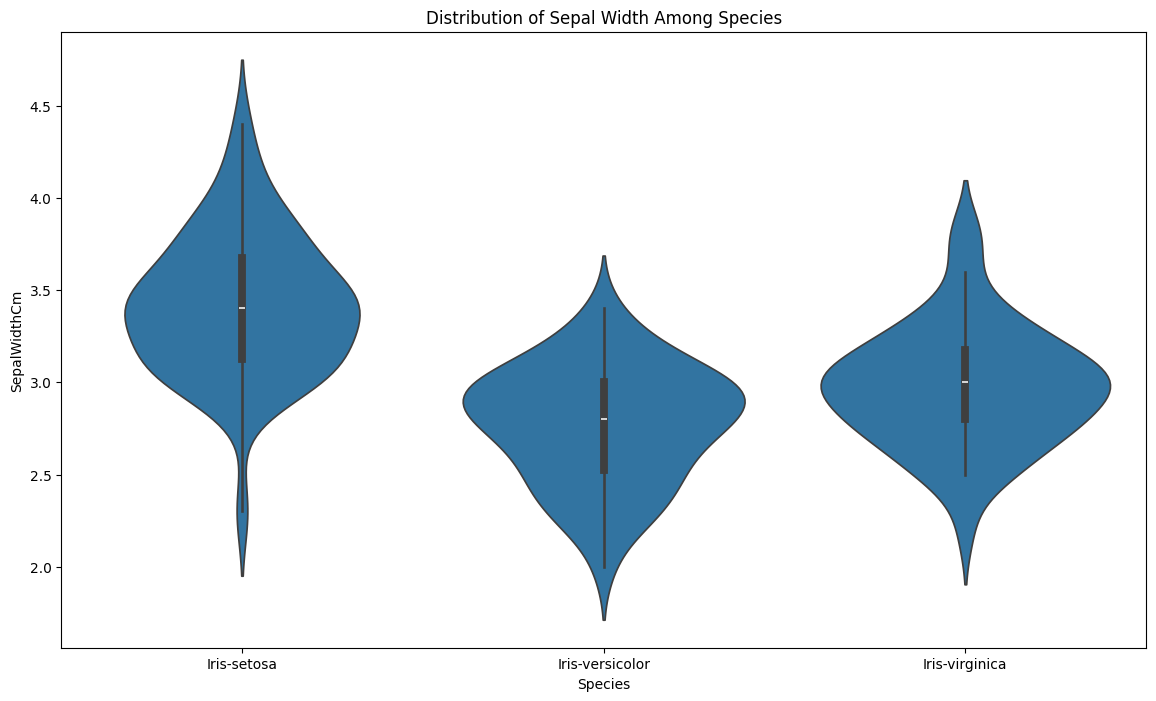

In [ ]:
# Violin plot to show distribution of features
plt.figure(figsize=(14, 8))
sns.violinplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Distribution of Sepal Width Among Species')
plt.show()

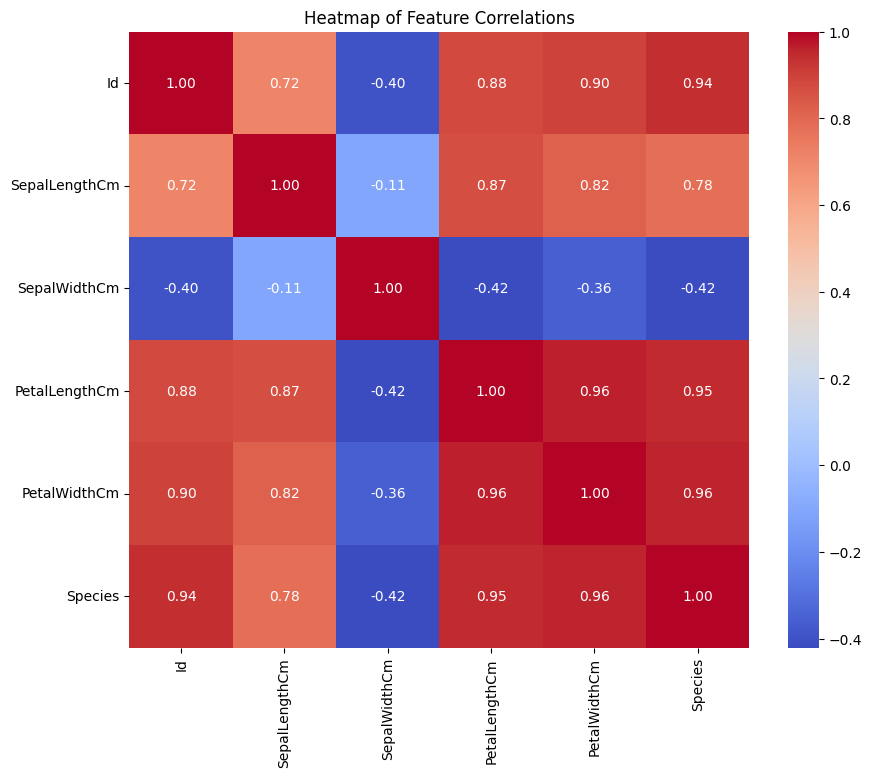

In [ ]:
# Convert 'Species' column to numerical representation using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

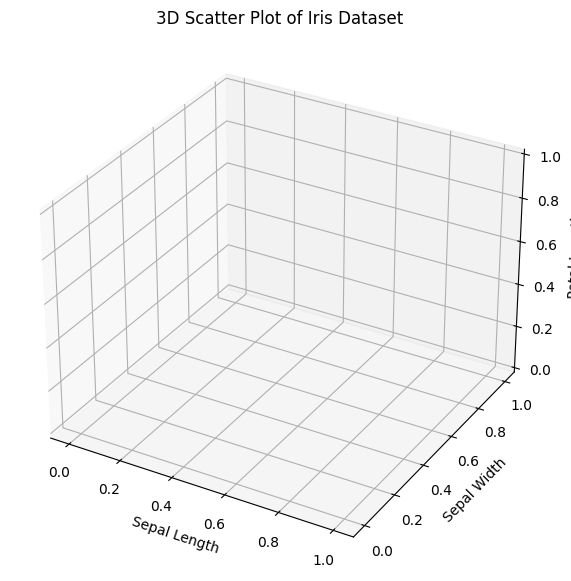

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['SepalLengthCm'], df['SepalWidthCm'], df['PetalLengthCm'],
           c=df['Species'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}), cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot of Iris Dataset')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
train, test = train_test_split(df, test_size = 0.20)
print(train.shape)
print(test.shape)

(120, 6)
(30, 6)


In [ ]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(train_X, train_y)

# Make predictions on the test set
y_pred = model.predict(test_X)

# Evaluate the model
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(test_y, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica'])) # Provide the target names directly

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, y_pred))

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         6
  Versicolor       1.00      0.93      0.97        15
   Virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[ 6  0  0]
 [ 0 14  1]
 [ 0  0  9]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest Model:")
random_forest_model.fit(train_X, train_y)
y_pred_rf = random_forest_model.predict(test_X)
accuracy_rf = accuracy_score(test_y, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

Random Forest Model:
Accuracy: 0.93


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
print("K-Nearest Neighbors Model:")
knn_model.fit(train_X, train_y)
y_pred_knn = knn_model.predict(test_X)
accuracy_knn = accuracy_score(test_y, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

K-Nearest Neighbors Model:
Accuracy: 0.93


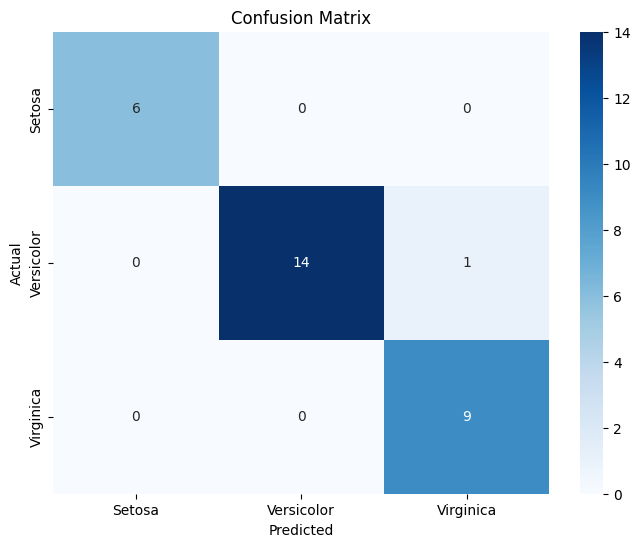

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_y, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()